In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# read csv
df = pd.read_csv("data/investigacion")

df.head()

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,1,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01T00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01T00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,3,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01T01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,4,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01T02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,5,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01T02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168250 entries, 0 to 1168249
Data columns (total 20 columns):
_id                     1168250 non-null int64
ao_hechos               1167817 non-null float64
mes_hechos              1167817 non-null object
fecha_hechos            1167817 non-null object
ao_inicio               1168250 non-null int64
mes_inicio              1168250 non-null object
fecha_inicio            1168250 non-null object
delito                  1168250 non-null object
fiscalia                1168248 non-null object
agencia                 1168250 non-null object
unidad_investigacion    1168023 non-null object
categoria_delito        1168250 non-null object
calle_hechos            1165281 non-null object
calle_hechos2           459035 non-null object
colonia_hechos          1120818 non-null object
alcaldia_hechos         1165073 non-null object
competencia             104171 non-null object
longitud                1121786 non-null float64
latitud                 1

### ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.
### Respuesta 1
- Realizar un EDA (Exploratory data analysis), para resumir sus principales características, utilizando gráficos estadísticos y otros métodos de visualización de datos

### ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [5]:
df['delito'].count()

1168250

In [7]:
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'])

print('Rango de fechas')

print(df['fecha_hechos'].min())

print(df['fecha_hechos'].max())

Rango de fechas
1906-06-02 19:00:00
2021-02-28 23:00:00


### ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [15]:
df.groupby('delito')['delito'].count().sort_values(ascending=False).head()

delito
VIOLENCIA FAMILIAR              116314
FRAUDE                           70594
ROBO DE OBJETOS                  68924
ROBO A NEGOCIO SIN VIOLENCIA     65363
AMENAZAS                         61248
Name: delito, dtype: int64

### 4 Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [112]:
data2 = df[df['fecha_hechos'].dt.year > 2018].copy()


delitos_alza = pd.pivot_table(data2, 
                            values='delito', 
                            index=df['delito'], 
                            columns=df['fecha_hechos'].dt.year, 
                            aggfunc='count', 
                            fill_value=None, 
                            margins=False, 
                            dropna=True, 
                            margins_name='All', 
                            observed=False)


delitos_alza


delitos_alza.reset_index(inplace=True)

delitos_alza.columns = ['delito',
                        'y_2019',
                        'y_2020',
                        'y_2021']

delitos_alza['change'] = (delitos_alza['y_2021'] - delitos_alza['y_2020']) / delitos_alza['y_2020'] * 100

delitos_alza.head()

print("Delitos a la alza: ")

delitos_alza[delitos_alza['y_2020'] > 1_000].sort_values('change', ascending= True).head()




Delitos a la alza: 


,delito,y_2019,y_2020,y_2021,change
172,ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIE...,6.0,1440.0,52.0,-96.388889
175,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,27.0,1401.0,72.0,-94.860814
158,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",5740.0,2629.0,159.0,-93.952073
2,ABUSO DE CONFIANZA,3736.0,3204.0,287.0,-91.042447
285,USURPACIÓN DE IDENTIDAD,3618.0,2655.0,277.0,-89.566855


In [113]:
print("Delitos a la baja: ")

delitos_alza[delitos_alza['y_2020'] > 1_000].sort_values('change', ascending= True).tail()

Delitos a la baja: 


,delito,y_2019,y_2020,y_2021,change
246,ROBO DE VEHICULO DE PEDALES,1500.0,1341.0,223.0,-83.370619
111,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,2318.0,1904.0,319.0,-83.245798
229,ROBO DE ACCESORIOS DE AUTO,8197.0,7365.0,1261.0,-82.878479
170,ROBO A NEGOCIO CON VIOLENCIA,5034.0,1851.0,398.0,-78.498109
142,PERDIDA DE LA VIDA POR OTRAS CAUSAS,1270.0,1320.0,308.0,-76.666667


### 5 ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [16]:
df.groupby('alcaldia_hechos')['delito'].count().sort_values(ascending=False).head()

alcaldia_hechos
CUAUHTEMOC          182733
IZTAPALAPA          175730
GUSTAVO A MADERO    117084
BENITO JUAREZ        97738
ALVARO OBREGON       78940
Name: delito, dtype: int64

In [17]:
df.groupby('alcaldia_hechos')['delito'].count().sort_values(ascending=True).head()

alcaldia_hechos
ABALA                           1
ENCARNACION DE DIAZ             1
SAN JUAN DE LOS LAGOS           1
SAN JUAN BAUTISTA ATATLAHUCA    1
ERONGARICUARO                   1
Name: delito, dtype: int64

### 6 Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [21]:
df.groupby(['alcaldia_hechos', 'colonia_hechos'])['delito'].count().sort_values(ascending=False).head(20)

alcaldia_hechos      colonia_hechos           
CUAUHTEMOC           CENTRO                       38682
                     DOCTORES                     22762
BENITO JUAREZ        DEL VALLE CENTRO             17142
CUAUHTEMOC           ROMA NORTE                   14182
BENITO JUAREZ        NARVARTE                     12516
MIGUEL HIDALGO       POLANCO                       9874
CUAUHTEMOC           JUÁREZ                        9753
IZTACALCO            AGRÍCOLA ORIENTAL             9485
CUAUHTEMOC           BUENAVISTA                    9422
                     GUERRERO                      9268
IZTAPALAPA           CENTRAL DE ABASTO             7849
IZTACALCO            AGRÍCOLA PANTITLAN            7774
CUAUHTEMOC           SANTA MARIA LA RIBERA         7660
COYOACAN             PEDREGAL DE SANTO DOMINGO     6817
BENITO JUAREZ        PORTALES SUR                  6465
VENUSTIANO CARRANZA  JARDÍN BALBUENA               6293
CUAUHTEMOC           MORELOS                       6282
 

### 7 ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

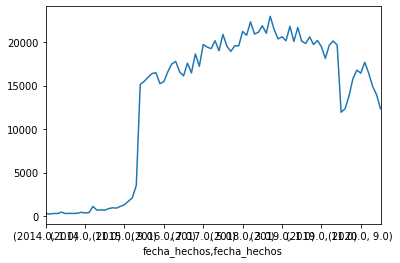

In [31]:
df[df['fecha_hechos'].dt.year >2013].groupby([df['fecha_hechos'].dt.year,df['fecha_hechos'].dt.month])['delito'].count().plot()

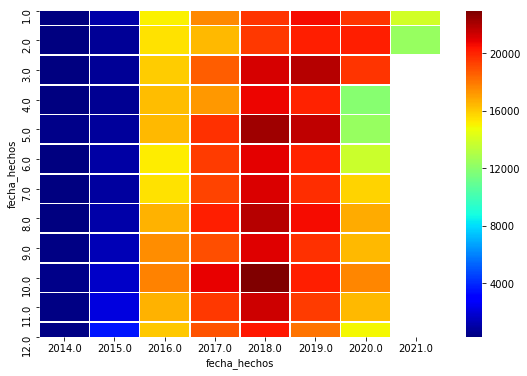

In [117]:
data = df[df['fecha_hechos'].dt.year >2013].copy()
tendencia1 = pd.pivot_table(data, 
                            values='delito', 
                            index=df['fecha_hechos'].dt.month, 
                            columns=df['fecha_hechos'].dt.year, 
                            aggfunc='count', 
                            fill_value=None, 
                            margins=False, 
                            dropna=True, 
                            margins_name='All', 
                            observed=False)


f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(tendencia1, 
            linewidths=.5, 
            ax=ax, 
            cmap='jet')

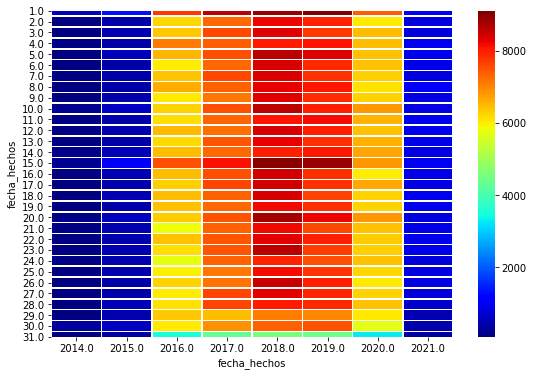

In [46]:
tendencia2 = pd.pivot_table(data, 
                            values='delito', 
                            index=df['fecha_hechos'].dt.day, 
                            columns=df['fecha_hechos'].dt.year, 
                            aggfunc='count', 
                            fill_value=None, 
                            margins=False, 
                            dropna=True, 
                            margins_name='All', 
                            observed=False)


f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(tendencia2, 
            linewidths=.5, 
            ax=ax, 
            cmap='jet')

### Respuesta 7
- Para los meses de marzo, mayo, junio y octubre tenemos un número mayor de delitos, los cuales se pueden relacionar con pago de bonos, pago de utilidades, vacaciones y buen fin 
- Los robos tienden a ser los días 1 y 15 de cada mes, seguidos de cada semana en un menor grado.

### 8 ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [121]:
df.groupby(['alcaldia_hechos','delito'])['delito'].count()

alcaldia_hechos  delito                                               
ABALA            DENUNCIA DE HECHOS                                        1
ACAMBARO         PRIVACION DE LA LIBERTAD PERSONAL                         1
                 VIOLENCIA FAMILIAR                                        1
ACAMBAY          ABUSO SEXUAL                                              1
                 FRAUDE                                                    1
                                                                          ..
ZUMPANGO         ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA      1
                 ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA     1
                 SUSTRACCION DE MENORES                                    2
                 USURPACIÓN DE IDENTIDAD                                   2
                 VIOLENCIA FAMILIAR                                       12
Name: delito, Length: 7324, dtype: int64

### Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).
- 9.1. Pinta un mapa con este indicador. Describe los resultados.

In [140]:
grouped = (df[(df['delito'] == 'HOMICIDIO POR ARMA DE FUEGO') |
          (df['delito'] == 'HOMICIDIO POR ARMA BLANCA')]).groupby(['alcaldia_hechos'])['delito'].count()

grouped

alcaldia_hechos
ALVARO OBREGON                  384
AMEALCO DE BONFIL                 1
AZCAPOTZALCO                    180
BENITO JUAREZ                    74
CABO CORRIENTES                   1
CELAYA                            2
CHALCO                            5
CHAPA DE MOTA                     1
CHICOLOAPAN                       1
CHIMALHUACAN                      5
COYOACAN                        191
CUAJIMALPA DE MORELOS            38
CUAUHTEMOC                      464
CUAUTITLAN IZCALLI                2
CUERNAVACA                        2
ECATEPEC DE MORELOS              12
ERONGARICUARO                     1
GUADALAJARA                       1
GUANAJUATO                        1
GUSTAVO A MADERO                898
HUIXQUILUCAN                      4
IGUALA DE LA INDEPENDENCIA        1
IXTAPAN DE LA SAL                 1
IZTACALCO                       208
IZTAPALAPA                     1197
JILOTEPEC                         1
LA MAGDALENA CONTRERAS           73
LA PAZ      

In [144]:
pp = pd.read_csv('data/RESAGEBURB_09TXT10.txt', sep='\s')

pp.head()

/Users/jorgemauricio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


ENTIDAD    NOM_ENT  \
9 Distrito Federal 0 Total        del  Distrito      Federal       0000   
                   2 Azcapotzalco 0000 Total             del  municipio   
                                  0001 Total              de         la   
                                       Total            AGEB     urbana   
                                       Azcapotzalco     0010        001   

                                                           MUN NOM_MUN  \
9 Distrito Federal 0 Total        del  Distrito          Total      de   
                   2 Azcapotzalco 0000 Total              0000     000   
                                  0001 Total         localidad  urbana   
                                       Total              0010     000   
                                       Azcapotzalco        202      96   

                                                        LOC  NOM_LOC    AGEB  \
9 Distrito Federal 0 Total        del  Distrito          la  entidad    0000   
                   2 Azcapotzalco 0000 Total         414711   196053  218658   
                                  0001 Total           0000      000  414711   
                                       Total           3424     1600    1824   
                                       Azcapotzalco     106        6       4   

                                                        MZA   POBTOT   POBMAS  \
9 Distrito Federal 0 Total        del  Distrito         000  8851080  4233783   
                   2 Azcapotzalco 0000 Total          14917     7688     7229   
                                  0001 Total         196053   218658    14917   
                                       Total             71       35       36   
                                       Azcapotzalco       *      193       91   

                                                     ... VPH_SNBIEN VPH_RADIO  \
9 Distrito Federal 0 Total        del  Distrito      ...       6250   2185469   
                   2 Azcapotzalco 0000 Total         ...      93517     52913   
                                  0001 Total         ...     112503    107269   
                                       Total         ...        762       466   
                                       Azcapotzalco  ...         21        45   

                                                      VPH_TV VPH_REFRI  \
9 Distrito Federal 0 Total        del  Distrito      2337884   2165900   
                   2 Azcapotzalco 0000 Total           60003     86750   
                                  0001 Total           93517     52913   
                                       Total             447       751   
                                       Azcapotzalco       26        15   

                                                    VPH_LAVAD VPH_AUTOM  \
9 Distrito Federal 0 Total        del  Distrito       1854623   1110374   
                   2 Azcapotzalco 0000 Total            88236     47225   
                                  0001 Total            60003     86750   
                                       Total              598       346   
                                       Azcapotzalco      None      None   

                                                      VPH_PC VPH_TELEF  \
9 Distrito Federal 0 Total        del  Distrito      1171631   1715772   
                   2 Azcapotzalco 0000 Total            None      None   
                                  0001 Total           88236     47225   
                                       Total            None      None   
                                       Azcapotzalco     None      None   

                                                       VPH_CEL VPH_INTER  
9 Distrito Federal 0 Total        del  Distrito      1817230.0  936648.0  
                   2 Azcapotzalco 0000 Total               NaN       NaN  
                                  0001 Total               NaN       NaN  
                                       Total               Na

In [128]:
df['delito'].sort_values().unique()

array(['ABANDONO DE PERSONA', 'ABORTO', 'ABUSO DE AUTORIDAD',
       'ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA',
       'ABUSO DE CONFIANZA', 'ABUSO SEXUAL', 'ACOSO SEXUAL',
       'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
       'ALLANAMIENTO DE MORADA',
       'ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL',
       'AMENAZAS', 'ASOCIACION DELICTUOSA',
       'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)',
       'ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN',
       'ATAQUES A LA PAZ PUBLICA', 'BIGAMIA', 'CALUMNIAS',
       'CAMBIO DE USO DE SUELO', 'COACCION DE SERVIDORES PUBLICOS',
       'COALICIÓN DE SERVIDORES PÚBLICOS', 'COBRANZA ILEGITIMA',
       'COHECHO', 'CONCUSION', 'CONTAGIO VENERERO',
       'CONTAMINACIÓN O RESIDUOS',
       'CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA',
       'CONTRA EL ESTADO CIVIL', 'CONTRA FUNCIONARIOS PUBLICOS',
       'CONTRA LA INTIMIDAD SEXUAL',
       'CONTRA LA LEY GENE

### 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

### 11 Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados).
- 11.1. ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

### 12 Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?